In [0]:
import pandas as pd
#그래프 표현
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns

In [0]:
#Colaboratory Matplotlib 에서 한글폰트 사용하기
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

sys_font number: 47
['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/liberation/Liberati

#2019년 5월동안 따릉이 이용한 이력 분석
- 데이터셋 사이트:<br>
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/201905.csv',header = None)
df.columns=['자전거번호','대여일시','대여소번호','대여소명','거치대번호','반납일시','반납대여소번호','반납대여소명','반납거치대번호','이용시간(분)','이용거리(M)']
df.head()

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납거치대번호,이용시간(분),이용거리(M)
0,SPB-01857,2019-05-01 0:01,1908,해원리바파크 육교 밑,3,2019-05-01 0:03,1957,구일고등학교 정문,6,2,480
1,SPB-18298,2019-05-01 0:03,241,신길우성1차아파트 앞 공원,5,2019-05-01 0:04,255,도림4거리,10,0,290
2,SPB-12844,2019-05-01 0:00,1224,아시아지하보도 2번 출구,13,2019-05-01 0:04,1249,아주중학교건너편,10,4,960
3,SPB-15490,2019-05-01 0:01,521,왕십리역 11번 출구 앞,2,2019-05-01 0:04,520,상왕십리역 4번 출구 앞,7,2,0
4,SPB-18475,2019-05-01 0:01,364,창신역 1번출구 앞,4,2019-05-01 0:04,361,동묘앞역 1번출구 뒤,1,3,730


In [0]:
df.tail()

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납거치대번호,이용시간(분),이용거리(M)
1048571,SPB-20039,2019-05-15 17:04,663,외대앞역 4번출구,4,2019-05-15 17:43,525,한양대병원사거리,13,36,8460
1048572,SPB-06262,2019-05-15 17:04,1209,잠실나루역 (2번 출구 쪽),8,2019-05-15 17:43,1201,가락시장역 3번 출구,7,38,3950
1048573,SPB-09800,2019-05-15 17:27,2302,교보타워 버스정류장(신논현역 3번출구 후면),10,2019-05-15 17:43,2409,역삼동 디오슈페리움 (우성아파트 사거리),2,15,1910
1048574,SPB-10351,2019-05-15 17:04,2381,언주역 6번출구앞,8,2019-05-15 17:43,2611,송파지역자활센터 뒤,5,39,8430
1048575,SPB-11823,2019-05-15 17:37,563,성동세무서 건너편,4,2019-05-15 17:43,584,광진광장 교통섬,19,5,960


In [0]:
df.shape

(1048576, 11)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 11 columns):
자전거번호      1048576 non-null object
대여일시       1048576 non-null object
대여소번호      1048576 non-null int64
대여소명       1048576 non-null object
거치대번호      1048576 non-null int64
반납일시       1048576 non-null object
반납대여소번호    1048576 non-null int64
반납대여소명     1048576 non-null object
반납거치대번호    1048576 non-null int64
이용시간(분)    1048576 non-null int64
이용거리(M)    1048576 non-null int64
dtypes: int64(6), object(5)
memory usage: 88.0+ MB


In [0]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여소번호      0
대여소명       0
거치대번호      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대번호    0
이용시간(분)    0
이용거리(M)    0
dtype: int64

In [0]:
# 대여량이 많은 상위 10위
df['대여소명'].value_counts().head(10)

여의나루역 1번출구 앞               9067
뚝섬유원지역 1번출구 앞              8532
고속터미널역 8-1번, 8-2번 출구 사이    5437
롯데월드타워(잠실역2번출구 쪽)          4554
봉림교 교통섬                    4552
건대입구역 사거리(롯데백화점)           4108
홍대입구역 2번출구 앞               3959
마포구민체육센터 앞                 3924
잠실새내역 5번 출구 뒤              3336
서울숲 관리사무소                  3303
Name: 대여소명, dtype: int64

In [0]:
# 반납량이 많은 상위 10위
df['반납대여소명'].value_counts().head(10)

뚝섬유원지역 1번출구 앞              10069
여의나루역 1번출구 앞                8719
고속터미널역 8-1번, 8-2번 출구 사이     5997
홍대입구역 2번출구 앞                4972
롯데월드타워(잠실역2번출구 쪽)           4620
봉림교 교통섬                     4608
마포구민체육센터 앞                  4562
건대입구역 사거리(롯데백화점)            4251
잠실새내역 5번 출구 뒤               3518
서울숲 관리사무소                   3334
Name: 반납대여소명, dtype: int64

- 역 근처에서 대여/반납이 많이 이루어진다.
- 대여량과 반납량이 많은 장소의 순위가 비슷하다.


In [0]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여소번호               int64
대여소명               object
거치대번호               int64
반납일시       datetime64[ns]
반납대여소번호             int64
반납대여소명             object
반납거치대번호             int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [0]:
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여요일'] = df['대여일시'].dt.dayofweek
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납요일'] = df['반납일시'].dt.dayofweek

In [0]:
df.tail()

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납거치대번호,이용시간(분),이용거리(M),대여일,대여시,대여요일,반납일,반납시,반납요일
1048571,SPB-20039,2019-05-15 17:04:00,663,외대앞역 4번출구,4,2019-05-15 17:43:00,525,한양대병원사거리,13,36,8460,15,17,2,15,17,2
1048572,SPB-06262,2019-05-15 17:04:00,1209,잠실나루역 (2번 출구 쪽),8,2019-05-15 17:43:00,1201,가락시장역 3번 출구,7,38,3950,15,17,2,15,17,2
1048573,SPB-09800,2019-05-15 17:27:00,2302,교보타워 버스정류장(신논현역 3번출구 후면),10,2019-05-15 17:43:00,2409,역삼동 디오슈페리움 (우성아파트 사거리),2,15,1910,15,17,2,15,17,2
1048574,SPB-10351,2019-05-15 17:04:00,2381,언주역 6번출구앞,8,2019-05-15 17:43:00,2611,송파지역자활센터 뒤,5,39,8430,15,17,2,15,17,2
1048575,SPB-11823,2019-05-15 17:37:00,563,성동세무서 건너편,4,2019-05-15 17:43:00,584,광진광장 교통섬,19,5,960,15,17,2,15,17,2


In [0]:
df.loc[df['대여시']!=df['반납시']]

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납거치대번호,이용시간(분),이용거리(M),대여일,대여시,대여요일,반납일,반납시,반납요일
1365,SPB-19082,2019-05-01 00:53:00,1416,상봉역 3번출구,10,2019-05-01 01:00:00,1447,면목역 3번출구,10,6,800,1,0,2,1,1,2
1366,SPB-17782,2019-05-01 00:45:00,2167,낙성대역 1번출구,5,2019-05-01 01:00:00,2222,사당역 12번출구 뒤,7,13,1860,1,0,2,1,1,2
1367,SPB-15883,2019-05-01 00:23:00,369,광화문 시민열린마당,4,2019-05-01 01:00:00,1306,한성대입구역2번출구,5,35,5660,1,0,2,1,1,2
1368,SPB-10440,2019-05-01 00:44:00,1414,사가정역 1번출구,2,2019-05-01 01:00:00,602,장안동 사거리,4,14,2370,1,0,2,1,1,2
1369,SPB-08580,2019-05-01 00:28:00,1346,길음8골어린이공원 옆,8,2019-05-01 01:00:00,335,종로3가역 15번출구 앞,5,30,6370,1,0,2,1,1,2
1370,SPB-15371,2019-05-01 00:52:00,740,으뜸공원,1,2019-05-01 01:00:00,1146,곰달래사거리,2,6,1220,1,0,2,1,1,2
1371,SPB-18346,2019-05-01 00:36:00,625,답십리초등학교 앞(현대시장 옆),2,2019-05-01 01:00:00,615,용두동 레미안허브리츠아파트 앞,13,23,2820,1,0,2,1,1,2
1372,SPB-05987,2019-05-01 00:37:00,625,답십리초등학교 앞(현대시장 옆),3,2019-05-01 01:00:00,615,용두동 레미안허브리츠아파트 앞,17,22,2810,1,0,2,1,1,2
1373,SPB-12824,2019-05-01 00:48:00,230,영등포구청역 1번출구,3,2019-05-01 01:00:00,239,유스호스텔 앞,10,11,840,1,0,2,1,1,2
1374,SPB-09615,2019-05-01 00:52:00,210,IFC몰,13,2019-05-01 01:00:00,224,롯데캐슬 앞,18,7,1070,1,0,2,1,1,2


##일별 대여/반납 현황

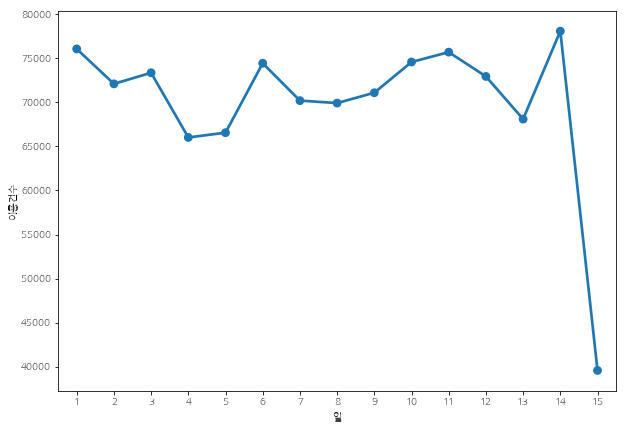

In [0]:
#대여일 = 반납일
day = pd.DataFrame(df['대여일'].value_counts())
day.reset_index(inplace=True)
day.columns = ['일', '이용건수']
day = day.sort_values('일')

# day.plot('일')
plt.figure(figsize=(10,7))
sns.pointplot(data=day, x='일', y='이용건수')

##요일별 대여/반납 현황

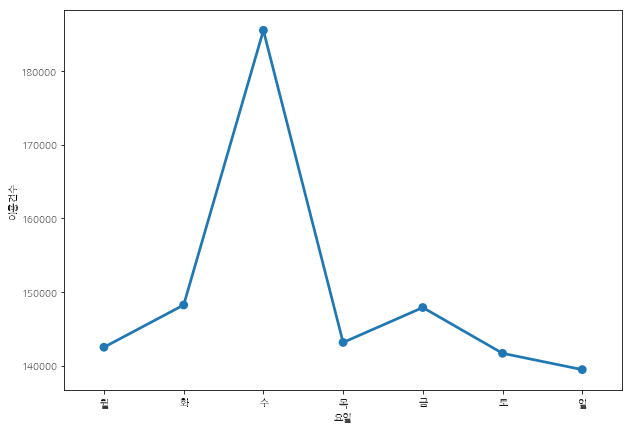

In [0]:
#대여요일 = 반납요일
dayweek = pd.DataFrame(df['대여요일'].value_counts())
dayweek.reset_index(inplace=True)
dayweek.columns = ['요일', '이용건수']
dayweek = dayweek.sort_values('요일')

dayweek_kor = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
dayweek['요일'] = dayweek['요일'].apply(lambda x: dayweek_kor[x])

plt.figure(figsize=(10,7))
sns.pointplot(data=dayweek, x='요일', y='이용건수')

- 평일에 비해 주말의 대여/반납 건수가 작다.<br> 
- 특히 수요일에 대여/반납이 활발히 이루어졌다

##시간별 대여/반납 현황

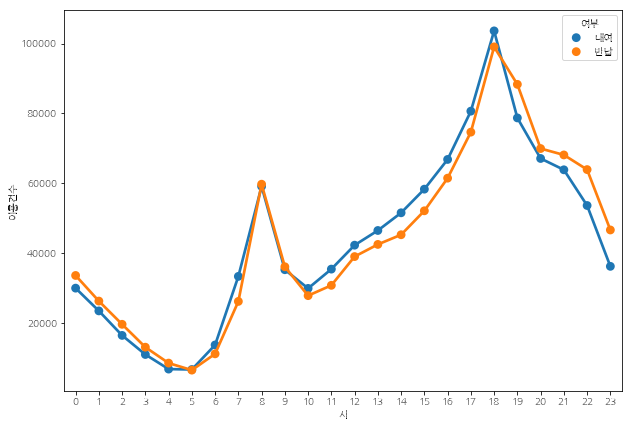

In [0]:
#대여시
hour = pd.DataFrame(df['대여시'].value_counts()).reset_index()
hour.columns = ['시', '이용건수']
hour['여부'] = '대여'
hour = hour.sort_values('시')

#반납시
hour2 = pd.DataFrame(df['반납시'].value_counts()).reset_index()
hour2.columns = ['시', '이용건수']
hour2['여부'] = '반납'
hour2 = hour2.sort_values('시')

hour_df = pd.concat([hour, hour2])
plt.figure(figsize=(10,7))
sns.pointplot(data=hour_df, x="시", y="이용건수", hue="여부")

- 6시부터 9시, 16시부터 20시에 이용수가 급격히 증가하는 것으로 보아 출퇴근 시간대에 많이 이용하는 것을 알 수 있다.
- 1시부터 6시(새벽)에는 이용수가 현저히 감소한다.
- 낮시간대에는 대여가 반납보다 많다.
- 19시 이후부터 새벽에는 반납이 대여보다 많다.

##실제 거치대 수가 많을수록 대여가 활발히 이루어졌을까?

In [0]:
rent_df = pd.read_csv('/content/gdrive/My Drive/bike_rent_service_gu.csv')
df2 = pd.merge(df, rent_df, on=['대여소번호','대여소명'])

result = pd.DataFrame(df2['구'].value_counts().reset_index())
result.columns = ['구', '이용건수']

num = rent_df['거치대수'].groupby(rent_df['구']).sum()
result = pd.merge(result, num, on=['구'])


In [0]:
result

,구,이용건수,거치대수
0,송파구,93697,1286
1,영등포구,91309,1265
2,마포구,75893,1058
3,광진구,72949,796
4,강서구,55071,989
5,성동구,52474,771
6,노원구,51808,881
7,강남구,47347,1228
8,서초구,47028,1256
9,종로구,41859,759


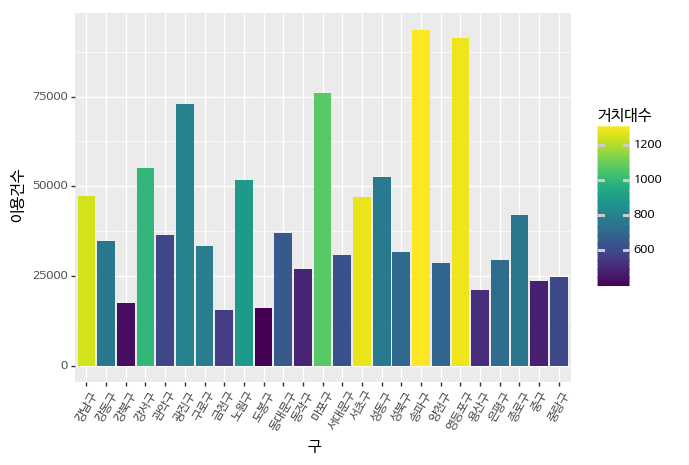

<ggplot: (8784401342819)>

In [0]:
from plotnine import *

(ggplot(result)
 + aes(x='구', y='이용건수', fill='거치대수')
 + geom_col()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

참고: https://nbviewer.jupyter.org/gist/miningful/42aaa00b607f0fa583ccfcd94475b6eb

###전반적으로 거치대 수가 많을수록 이용건수가 높았다.
- 강남구, 강서구, 서초구, 마포구는 이용건수에 비해 거치대 수가 많았다.
- 광진구, 성동구는 이용건수에 비해 거치대 수가 작았다.